### Load required libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import time
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import math
import pickle
import warnings
warnings.filterwarnings('ignore', category= FutureWarning)
warnings.filterwarnings('ignore', category= DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)
import streamlit
import imblearn

In [62]:
print('The numpy version is {}.'.format(np.__version__))
print('The pandas version is {}.'.format(pd.__version__))
print('The numpy version is {}.'.format(np.__version__))
print('The streamlit version is {}.'.format(streamlit.__version__))
print('The seaborn version is {}.'.format(sns.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The imblearn version is {}.'.format(imblearn.__version__))

The numpy version is 1.24.3.
The pandas version is 1.5.3.
The numpy version is 1.24.3.
The streamlit version is 1.34.0.
The seaborn version is 0.12.2.
The scikit-learn version is 1.3.0.
The imblearn version is 0.11.0.


In [2]:
df = pd.read_csv('Healthcare-Diabetes.csv') # Load the dataset into a data frame

In [3]:
df.shape

(2768, 10)

In [4]:
# define a function to check the features of the dataset
def get_features_name():
    OriginalFeatures = df.columns
    print('The number of variables in the original dataset is : ', len(OriginalFeatures), '\n')
    print('The features are listed below:')
    for i in range(len(OriginalFeatures)):
        print(i+1,' ', OriginalFeatures[i])

In [5]:
get_features_name()

The number of variables in the original dataset is :  10 

The features are listed below:
1   Id
2   Pregnancies
3   Glucose
4   BloodPressure
5   SkinThickness
6   Insulin
7   BMI
8   DiabetesPedigreeFunction
9   Age
10   Outcome


#### Data Cleaning Process

In [6]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [8]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [9]:
df.isna().sum() # Check for missing values

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.duplicated().sum() # Check for duplicate data

0

### Exploratory Data Analysis

In [11]:
df['Outcome'].value_counts()

0    1816
1     952
Name: Outcome, dtype: int64

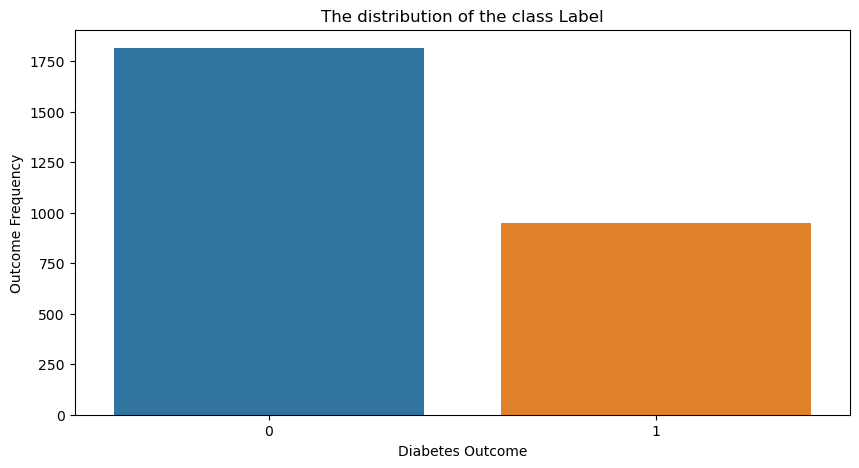

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.countplot(df, x='Outcome')
plt.title('The distribution of the class Label')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Outcome Frequency')
plt.show()

### Data Preprocessing

In [13]:
df.drop('Id', axis = 1, inplace = True) # Drop the Id feature as it will not be required in our modeling
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Check the correllation between each independent feature and the label (Outcome)

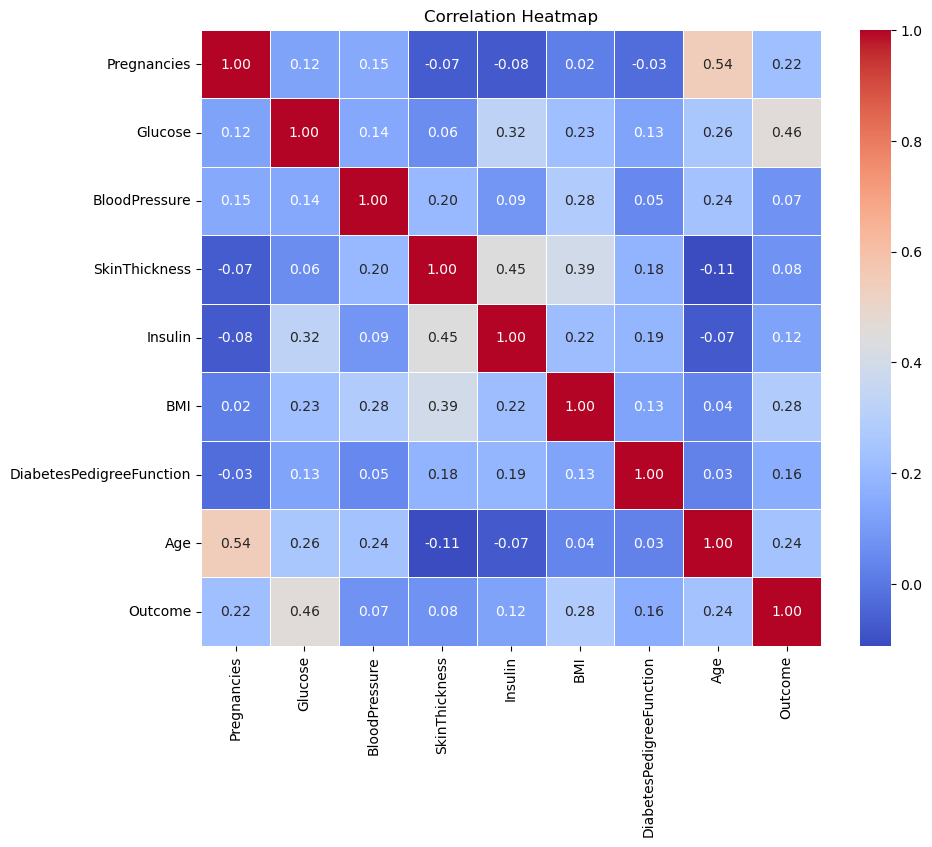

In [14]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Break the dataset into independent and dependent variables (Features and Label)

In [15]:
# the independent variables - inputs are made up of 8 features
features = df.drop('Outcome', axis = 1) # Independent variables
label = df['Outcome'] # Dependent variable

In [16]:
# Explore the feature variables
features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [17]:
# explore the label variable
label.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Preprocessing- Split the dataset into training and test data

In [18]:
# split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.3, stratify=label, random_state=0)
print(f'The training dataset:\t {X_train.shape}')
print(f'The test dataset:\t {X_test.shape}')

The training dataset:	 (1937, 8)
The test dataset:	 (831, 8)


### Data balancing

In [19]:

resampler = SMOTE(random_state = 0)

X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train) # Resample the training dataset

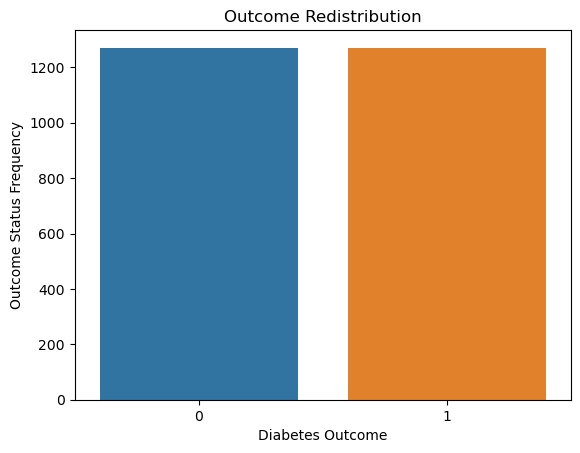

In [20]:
sns.countplot(x = y_train_resampled)
plt.title('Outcome Redistribution')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Outcome Status Frequency')
plt.show()

### Decision Tree Model

In [21]:
print(DecisionTreeClassifier().get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [22]:
# Define the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
params = {
    'max_depth': [20,30, 40],
    'min_samples_leaf': [1, 5,10],
    'criterion': ['gini', 'entropy']
}

# Instantiate the GridSearchCV object
grid_search_dt = GridSearchCV(estimator=dt,
                              param_grid=params,
                              cv=5,
                              n_jobs=-1,
                              verbose=1,
                              scoring="accuracy")

# Measure the time taken for fitting the model
start_time = time.time()
grid_search_dt.fit(X_train_resampled, y_train_resampled)
end_time = time.time()

# Print the time taken
print(f"Grid search took {round(end_time - start_time)} seconds")
best_score = (grid_search_dt.best_score_)

print(f"Best parameters found: {grid_search_dt.best_params_}")
print(f"Best accuracy score: {best_score}%")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Grid search took 14 seconds
Best parameters found: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1}
Best accuracy score: 0.9579065018640843%


### Use the best hyperparameters from the above gridsearch cross validation to train the model

In [23]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 20, min_samples_leaf = 1, random_state = 0) # model with default parameters
classifier_dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=0)

### Use the model to make prediction on the training data

The accuracy of the prediction of the model is 100.0%


Decision Tree Model on Train Data Confusion Matrix:
[[1271    0]
 [   0  666]] 


Decision Tree Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1271
           1       1.00      1.00      1.00       666

    accuracy                           1.00      1937
   macro avg       1.00      1.00      1.00      1937
weighted avg       1.00      1.00      1.00      1937



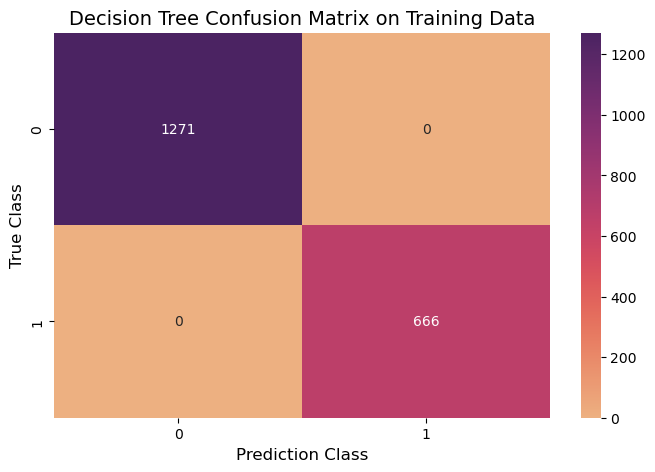

In [24]:
# Use model to make predition on the training data
y_pred_train = classifier_dt.predict(X_train)


pred_acc_decision_tree = round(metrics.accuracy_score(y_train, y_pred_train)*100, 2)# round the result to two decimal places
print(f'The accuracy of the prediction of the model is {pred_acc_decision_tree}%\n\n')
cm = metrics.confusion_matrix(y_train, y_pred_train)
print('Decision Tree Model on Train Data Confusion Matrix:')
print(cm, '\n\n')
print('Decision Tree Classification Report: \n')
print('======================================================')
result = metrics.classification_report(y_train, y_pred_train)
print(result)
print('======================================================')

plt.figure(figsize = (8,5))
ax = sns.heatmap(cm, cmap = 'flare', annot = True, fmt = 'd')
plt.xlabel('Prediction Class', fontsize = 12)
plt.ylabel('True Class', fontsize = 12)
plt.title('Decision Tree Confusion Matrix on Training Data', fontsize = 14)

plt.show()

###### The accuracy of the model on the training data is 100%

### Use the model to make prediction with the test data

The accuracy of the prediction of the model is 97.23%


Decision Tree Model on Train Data Confusion Matrix:
[[531  14]
 [  9 277]] 


Decision Tree Classification Report: 

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       545
           1       0.95      0.97      0.96       286

    accuracy                           0.97       831
   macro avg       0.97      0.97      0.97       831
weighted avg       0.97      0.97      0.97       831



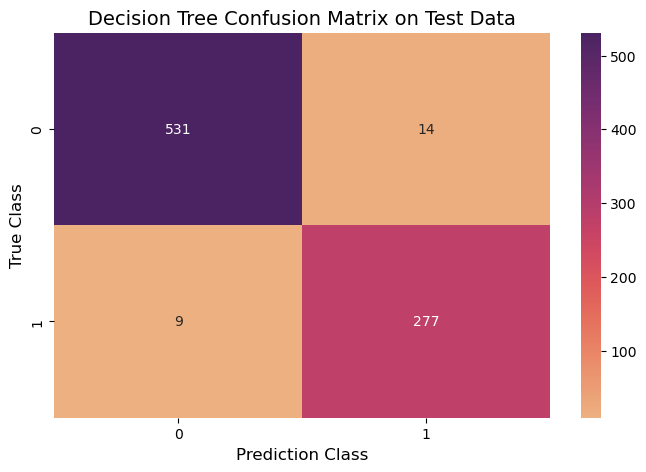

In [25]:
# Use model to make predition on the training data
y_pred_test = classifier_dt.predict(X_test)


pred_acc_test = round(metrics.accuracy_score(y_test, y_pred_test)*100, 2)# round the result to two decimal places
print(f'The accuracy of the prediction of the model is {pred_acc_test}%\n\n')
cm = metrics.confusion_matrix(y_test, y_pred_test)
print('Decision Tree Model on Train Data Confusion Matrix:')
print(cm, '\n\n')
print('Decision Tree Classification Report: \n')
print('======================================================')
result = metrics.classification_report(y_test, y_pred_test)
print(result)
print('======================================================')

plt.figure(figsize = (8,5))
ax = sns.heatmap(cm, cmap = 'flare', annot = True, fmt = 'd')
plt.xlabel('Prediction Class', fontsize = 12)
plt.ylabel('True Class', fontsize = 12)
plt.title('Decision Tree Confusion Matrix on Test Data', fontsize = 14)

plt.show()

### Decision Tree Model Ends Here

### Random Forest Implementation

In [27]:
rf = RandomForestClassifier()
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [28]:
# Hyperparameters tuning using gridsearch with cross validation to enable us choose the best parameters fr our model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 5, 10, 15],
    'n_estimators': [10, 30, 50, 100]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1,
                           verbose=1,
                           scoring="accuracy")

# Measure the time taken for fitting the model
start_time = time.time()
grid_search.fit(X_train_resampled, y_train_resampled)
end_time = time.time()

# Print the time taken
print(f"Grid search took {round(end_time - start_time)} seconds")

# If you want to see the best parameters found
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy score: {grid_search.best_score_}")


Fitting 5 folds for each of 160 candidates, totalling 800 fits
Grid search took 166 seconds
Best parameters found: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 100}
Best accuracy score: 0.975209226056959


### Fit the model into training data

In [29]:
classifier_rf = RandomForestClassifier(criterion = 'entropy', max_depth = 20, n_estimators = 100, min_samples_leaf = 1, random_state=42)
classifier_rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(criterion='entropy', max_depth=20, random_state=42)

In [30]:
# Use the trained model to make prediction using the training dataset

y_pred_training_rf = classifier_rf.predict(X_train)

# y_pred_training_rf

The accuracy of the prediction of the model is 100.0%


Decision Tree Model on Train Data Confusion Matrix:
[[1271    0]
 [   0  666]] 


Random Forest Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1271
           1       1.00      1.00      1.00       666

    accuracy                           1.00      1937
   macro avg       1.00      1.00      1.00      1937
weighted avg       1.00      1.00      1.00      1937



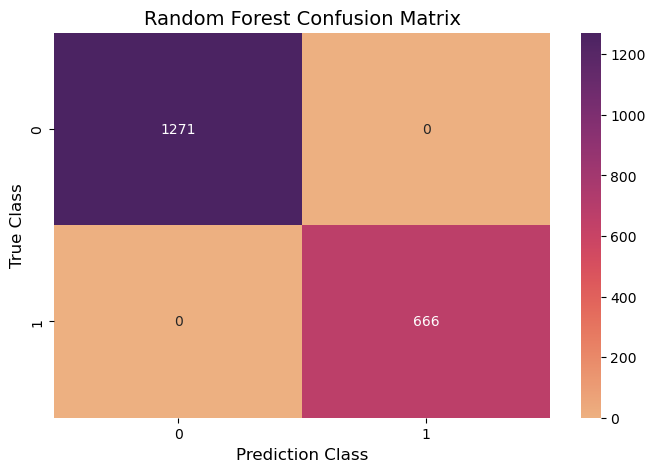

In [31]:
pred_acc_rf = round(metrics.accuracy_score(y_train, y_pred_training_rf)*100, 2)# round the result to two decimal places
print(f'The accuracy of the prediction of the model is {pred_acc_rf}%\n\n')
cm = metrics.confusion_matrix(y_train, y_pred_training_rf)
print('Decision Tree Model on Train Data Confusion Matrix:')
print(cm, '\n\n')
print('Random Forest Classification Report: \n')
print('======================================================')
result = metrics.classification_report(y_train, y_pred_training_rf)
print(result)
print('======================================================')

plt.figure(figsize = (8,5))
ax = sns.heatmap(cm, cmap = 'flare', annot = True, fmt = 'd')
plt.xlabel('Prediction Class', fontsize = 12)
plt.ylabel('True Class', fontsize = 12)
plt.title('Random Forest Confusion Matrix', fontsize = 14)

plt.show()

### Apply model on test dataset

In [32]:
# Use model to make predition on the test data
y_pred_rf_test = classifier_rf.predict(X_test)

The accuracy of the prediction of the model is 97.83%


Random Forest Model on Train Data Confusion Matrix:
[[534  11]
 [  7 279]] 


Random Forest Classification Report: 

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       545
           1       0.96      0.98      0.97       286

    accuracy                           0.98       831
   macro avg       0.97      0.98      0.98       831
weighted avg       0.98      0.98      0.98       831



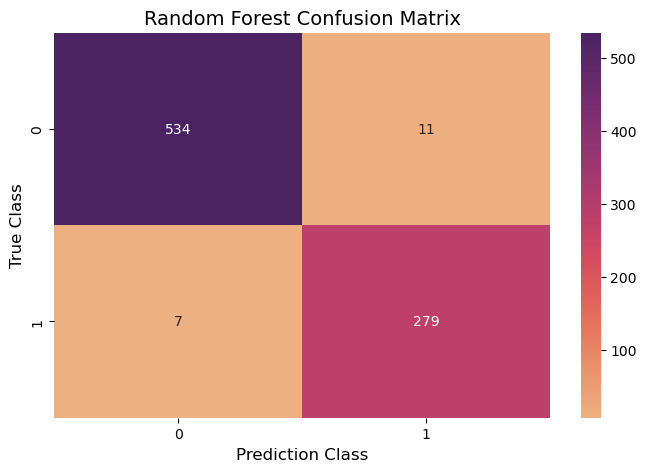

In [33]:
pred_acc_rf_test = round(metrics.accuracy_score(y_test, y_pred_rf_test)*100, 2)# round the result to two decimal places
print(f'The accuracy of the prediction of the model is {pred_acc_rf_test}%\n\n')
cm = metrics.confusion_matrix(y_test, y_pred_rf_test)
print('Random Forest Model on Train Data Confusion Matrix:')
print(cm, '\n\n')
print('Random Forest Classification Report: \n')
print('======================================================')
result = metrics.classification_report(y_test, y_pred_rf_test)
print(result)
print('======================================================')

plt.figure(figsize = (8,5))
ax = sns.heatmap(cm, cmap = 'flare', annot = True, fmt = 'd')
plt.xlabel('Prediction Class', fontsize = 12)
plt.ylabel('True Class', fontsize = 12)
plt.title('Random Forest Confusion Matrix', fontsize = 14)

plt.show()

### Support Vector Machine Implementation

### Hyperparameters Tuning (SVM)

In [34]:
from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# Define the Support Vector Classifier
svc = SVC(random_state=42)

# Define the parameter grid
params = {
    'C': [15,20],
    'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto'],
#     'degree': [2, 3, 4, 5]  # Only relevant for 'poly' kernel
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=svc,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1,
                           verbose=1,
                           scoring="accuracy")

# Measure the time taken for fitting the model
start_time = time.time()
grid_search.fit(X_train_resampled, y_train_resampled)
end_time = time.time()

# Print the time taken
print(f"Grid search took {round(end_time - start_time)} seconds")

# If you want to see the best parameters found
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy score: {grid_search.best_score_}")


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Grid search took 1649 seconds
Best parameters found: {'C': 20, 'kernel': 'rbf'}
Best accuracy score: 0.7883521804371703


In [35]:
from sklearn import svm
classifier_svm = svm.SVC(random_state=42) # model the data
classifier_svm.fit(X_train_resampled, y_train_resampled) # fit the training dataset into the model

SVC(random_state=42)

In [36]:
y_pred_svm = classifier_svm.predict(X_train)
y_pred_svm

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

The accuracy of the training prediction of the model is 78.11%


Random Forest Model on Train Data Confusion Matrix:
[[1025  246]
 [ 178  488]] 


Random Forest Classification Report: 

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1271
           1       0.66      0.73      0.70       666

    accuracy                           0.78      1937
   macro avg       0.76      0.77      0.76      1937
weighted avg       0.79      0.78      0.78      1937



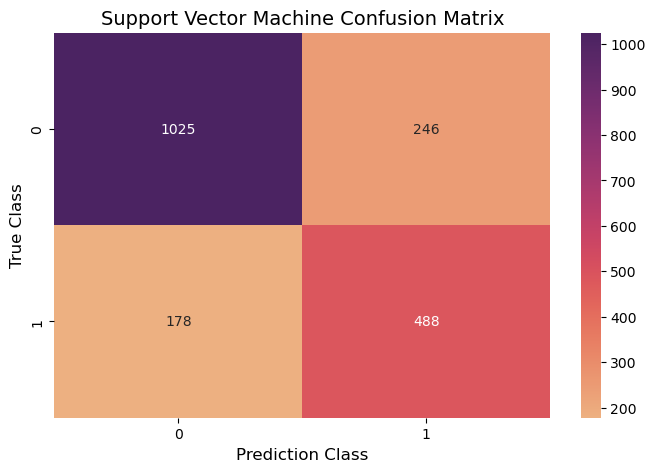

In [37]:
pred_acc_svm_train = round(metrics.accuracy_score(y_train, y_pred_svm)*100, 2)# round the result to two decimal places
print(f'The accuracy of the training prediction of the model is {pred_acc_svm_train}%\n\n')
cm = metrics.confusion_matrix(y_train, y_pred_svm)
print('Random Forest Model on Train Data Confusion Matrix:')
print(cm, '\n\n')
print('Random Forest Classification Report: \n')
print('======================================================')
result = metrics.classification_report(y_train, y_pred_svm)
print(result)
print('======================================================')

plt.figure(figsize = (8,5))
ax = sns.heatmap(cm, cmap = 'flare', annot = True, fmt = 'd')
plt.xlabel('Prediction Class', fontsize = 12)
plt.ylabel('True Class', fontsize = 12)
plt.title('Support Vector Machine Confusion Matrix', fontsize = 14)

plt.show()

### Use model to predict on test data

The SVM model on test data accuracy:		 74.85%
The SVM Confusion Matrix Report
[[425 120]
 [ 89 197]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       545
           1       0.62      0.69      0.65       286

    accuracy                           0.75       831
   macro avg       0.72      0.73      0.73       831
weighted avg       0.76      0.75      0.75       831



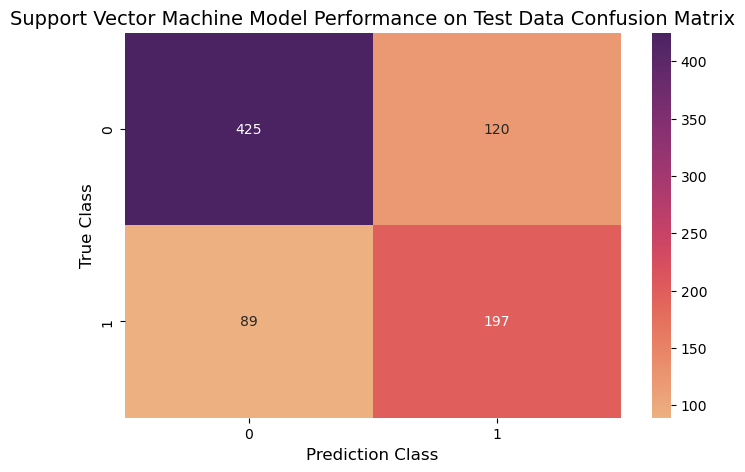

In [38]:
y_pred_svm_test = classifier_svm.predict(X_test)
# print(y_pred_svm_test)
svm_test_accuracy_score = round(metrics.accuracy_score(y_test, y_pred_svm_test) * 100, 2)

print(f'The SVM model on test data accuracy:\t\t {svm_test_accuracy_score}%')
cm = metrics.confusion_matrix(y_test, y_pred_svm_test)
print('The SVM Confusion Matrix Report')
print(cm)
result = metrics.classification_report(y_test, y_pred_svm_test)
print(result)

plt.figure(figsize = (8,5))
ax = sns.heatmap(cm, cmap = 'flare', annot = True, fmt = 'd')
plt.xlabel('Prediction Class', fontsize = 12)
plt.ylabel('True Class', fontsize = 12)
plt.title('Support Vector Machine Model Performance on Test Data Confusion Matrix', fontsize = 14)

plt.show()

### Test the model with single data

In [41]:
# # Initialise filenames for the different models
# filename_dt = 'dt.sav' 
# filename_sv = 'svm.sav' 
# filename_rf = 'rf.sav' 

# # filename = [filename_dt, filename_sv, filename_rf]
# model_choice = int(input('Enter Model for Prediction: 1 for Decision Tree, 2 for Random Forest, 3 for Support Vector'))
# if model_choice == 1:
#     pickle.dump(classifier_dt, open(filename_dt, 'wb'))
#     loaded_model = pickle.load(open('dt.sav', 'rb'))
# elif model_choice == 2:
#     pickle.dump(classifier_svm, open(filename_rf, 'wb'))
#     loaded_model = pickle.load(open('svm.sav', 'rb'))
# else:
#     pickle.dump(classifier_rf, open(filename_sv, 'wb'))
#     pickle.dump(classifier_svm, open(filename_sv, 'wb'))

# user_input = (1,107,68,19,0,26.5,0.165,24) # Patient data for diagnosis

# user_input_np_array = np.asarray(user_input) # convert the input to a numpy array
# user_input_reshape = user_input_np_array.reshape(1, -1) # reshape the input_numpy_array

# prediction = loaded_model.predict(user_input_reshape)

# # print(prediction)
# # Decision Tree Model Choice
# if prediction[0] == 1 and model_choice == 1:
#     print('Diabetes Alert')
#     print(f'Accuracy Level: {round(pred_acc_test)}%')
#     print(f'Patient is likely to be diabetic')
# #     print(filename[i])
# elif prediction[0] == 0 and model_choice ==1:
#     print('Diabetes Alert')
#     print('Patient has a higher chance of not being diabetic at this time')
#     print(f'Accuracy Level: {round(pred_acc_test)}%')
# #     print(filename[i])

# # Random Forest Model Choice
# elif prediction[0] == 1 and model_choice == 2:
#     print('Diabetes Alert')
#     print(f'Accuracy Level: {round(pred_acc_rf_test)}%')
#     print(f'Patient is likely to be diabetic')
# #     print(filename[i])
# elif prediction[0] == 0 and model_choice ==2:
#     print('Diabetes Alert')
#     print('Patient has a higher chance of not being diabetic at this time')
#     print(f'Accuracy Level: {round(pred_acc_rf_test)}%')
# #     print(filename[i])

# # Support Vector Machine Model Choice
# elif prediction[0] == 1 and model_choice == 3:
#     print('Diabetes Alert')
#     print(f'Accuracy Level: {round(svm_test_accuracy_score)}%')
#     print(f'Patient is likely to be diabetic')
# #     print(filename[i])
# else:
#     print('Diabetes Alert')
#     print('Patient has a higher chance of not being diabetic at this time')
#     print(f'Accuracy Level: {round(svm_test_accuracy_score)}%')
# #     print(filename[i])


    
    
    
    
    
   

In [46]:
# Function to save and load models
def save_model(model, filename):
    pickle.dump(model, open(filename, 'wb'))

def load_model(filename):
    return pickle.load(open(filename, 'rb'))

# Function to predict and print results
def predict_diabetes(model, user_input, accuracy, model_name):
    user_input_np_array = np.asarray(user_input)  # convert the input to a numpy array
    user_input_reshape = user_input_np_array.reshape(1, -1)  # reshape the input_numpy_array

    prediction = model.predict(user_input_reshape)

    print("Diabetes Alert")
    if prediction[0] == 1:
        print(f"Accuracy Level: {round(accuracy)}%")
        print(f"Patient is likely to be diabetic using {model_name}")
    else:
        print(f"Accuracy Level: {round(accuracy)}%")
        print(f"Patient has a higher chance of not being diabetic at this time using {model_name}")

# Initialise filenames for the different models
filenames = {
    1: ('classifier_dt', 'dt.sav', 'Decision Tree', pred_acc_test),
    2: ('classifier_rf', 'rf.sav', 'Random Forest', pred_acc_rf_test),
    3: ('classifier_svm', 'svm.sav', 'Support Vector Machine', svm_test_accuracy_score)
}

# User input for model choice
model_choice = int(input('Enter Model for Prediction: 1 for Decision Tree, 2 for Random Forest, 3 for Support Vector: '))
if model_choice in filenames:
    model_var, filename, model_name, accuracy = filenames[model_choice]
    
    # Save the chosen model
    save_model(globals()[model_var], filename)
    
    # Load the chosen model
    loaded_model = load_model(filename)
    
    # Patient data for diagnosis
    user_input = (1, 107, 68, 19, 0, 26.5, 0.165, 24)
#     user_input = float(input('Enter required inputs separated by comma'))
    # Predict and print results
    predict_diabetes(loaded_model, user_input, accuracy, model_name)
else:
    print("Invalid model choice.")


Enter Model for Prediction: 1 for Decision Tree, 2 for Random Forest, 3 for Support Vector: 1
Diabetes Alert
Accuracy Level: 97%
Patient has a higher chance of not being diabetic at this time using Decision Tree


### Models Summary Report on Test Data

In [43]:
alg = ['Decision Tree', 'Random Forest', 'Support Vector']
model = ['classifier_dt', 'classifier_rf', 'classifier_svm']

print(f'==============================================================')
print(f'||\t\tModel Evaluation Accuracy Report\t    ||')
print(f'==============================================================')
print(f'{"Algorithm":<20} {"Model Name":<25} \t  {"Accuracy(%)":<10}')
print(f'==============================================================')

for col in range(len(alg)):
    if alg[col] == 'Decision Tree':
        print(f'||{alg[col]:<20}||{model[col]:<25}||{pred_acc_test:<10.2f}||')
    elif alg[col] == 'Random Forest':
        print(f'||{alg[col]:<20}||{model[col]:<25}||{pred_acc_rf_test:<10.2f}||')
    else:
        print(f'||{alg[col]:<20}||{model[col]:<25}||{svm_test_accuracy_score:<10.2f}||')
print(f'==============================================================')

||		Model Evaluation Accuracy Report	    ||
Algorithm            Model Name                	  Accuracy(%)
||Decision Tree       ||classifier_dt            ||97.23     ||
||Random Forest       ||classifier_rf            ||97.83     ||
||Support Vector      ||classifier_svm           ||74.85     ||


### Discussion on the outcome

###### The three different models were successfully implementat and the accuracy level indicates 
###### that the least performing model in predicting patient's diabetic status is the Support Vector Machine
###### model with an accuracy of 74% while the most efficient model is the Random Forest with an accuracy of
###### 98% when applied on the test data. The decision tree model performance is equally commendable just
###### a little lesser than the Random Forest model but way higher than the SVM model

In [74]:
y_pred_svm.ravel()

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [73]:
y_test

1648    0
1780    0
4       1
2678    0
153     0
       ..
2215    0
2015    0
1959    0
2144    1
29      0
Name: Outcome, Length: 831, dtype: int64

In [ ]:
X_test['Outcome'] = y_test[0]

y_pred_rf_test
y_pred_svm_test

X_test.to_csv('test_dataset_update.csv',index=False)